## Import Statements

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

## Summary

- Used `.groupby()` to explore the number of posts and entries per programming language
- Converted strings to Datetime objects with `to_datetime()` for easier plotting
- Reshaped our DataFrame by converting categories to columns using `.pivot()`
- Used `.count()` and `isna().values.any()` to look for NaN values in our DataFrame, which we then replaced using `.fillna()`
- Created (multiple) line charts using `.plot()` with a for-loop
- Styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.
- Added a legend to tell apart which line is which by colour
- Smoothed out our time-series observations with `.rolling().mean()` and plotted them to better identify trends over time.

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [124]:
df = pd.read_csv('data/stackoverflow_query_results.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows, and the last 5 rows of the dataframe

In [125]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [126]:
df.tail()

,DATE,TAG,POSTS
2056,2020-12-01 00:00:00,php,5803
2057,2020-12-01 00:00:00,perl,132
2058,2020-12-01 00:00:00,ruby,567
2059,2020-12-01 00:00:00,r,5010
2060,2020-12-01 00:00:00,swift,2511


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [127]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

In [128]:
df.shape

(2061, 3)

**Challenge**: Count the number of entries in each column of the dataframe
- This could tell the number of NaN values

In [129]:
df.count()

DATE     2061
TAG      2061
POSTS    2061
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?
- Javascript

In [130]:
df.groupby('TAG').sum('POSTS').sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2140516
java,1738725
python,1611615
c#,1452939
php,1383015
c++,705559
r,380490
c,347596
swift,285135


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?
- Go

In [131]:
df.groupby('TAG').count().sort_values('DATE')

,DATE,POSTS
TAG,,
go,134,134
swift,140,140
r,147,147
assembly,149,149
c,149,149
c++,149,149
delphi,149,149
java,149,149
javascript,149,149


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [132]:
type(df['DATE'][1])

str

In [133]:
df.DATE = pd.to_datetime(df.DATE)

In [134]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation

In [135]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [136]:
reshaped_df.shape

(150, 14)

In [137]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,510.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1649.0,754.0,105.0,NaN,1136.0,640.0,131.0,481.0,541.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1988.0,811.0,112.0,NaN,1153.0,725.0,127.0,616.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,580.0,97.0,504.0,452.0,1.0,160.0,NaN


In [138]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?
- NaN are not counted with `.count()`
- NaN entries. Use `.fillna()` to have `0` instead of NaN

In [139]:
reshaped_df.count()

TAG
assembly      149
c             149
c#            150
c++           149
delphi        149
go            134
java          149
javascript    149
perl          149
php           149
python        149
r             147
ruby          149
swift         140
dtype: int64

In [140]:
reshaped_df.fillna(0, inplace=True)

In [141]:
reshaped_df.isna().values.any()

False

In [142]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,510.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1649.0,754.0,105.0,0.0,1136.0,640.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1988.0,811.0,112.0,0.0,1153.0,725.0,127.0,616.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,580.0,97.0,504.0,452.0,1.0,160.0,0.0


## Data Visualisation with Matplotlib

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

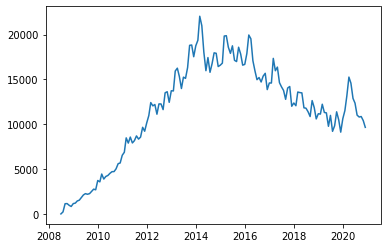

In [143]:
plt.plot(reshaped_df.index, reshaped_df.java)

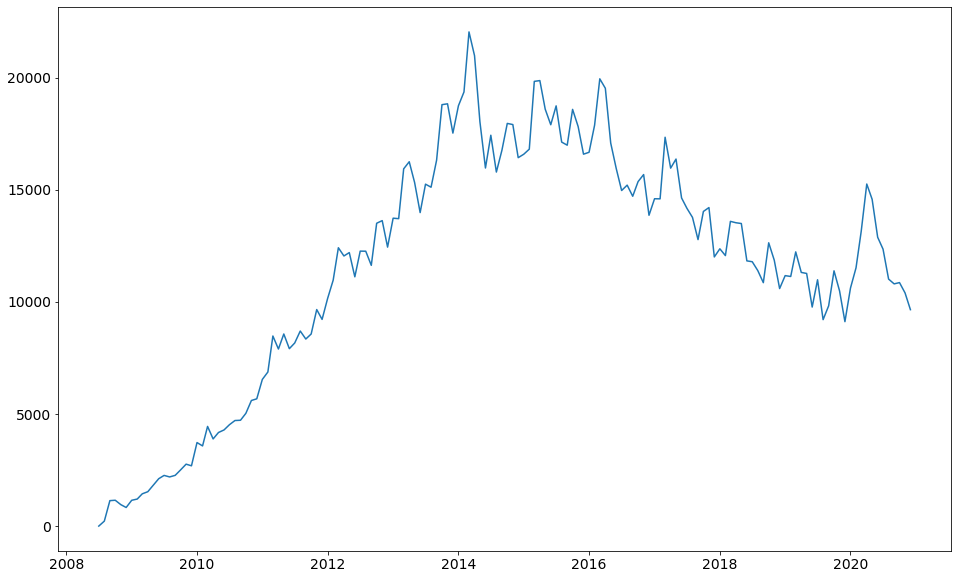

In [144]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

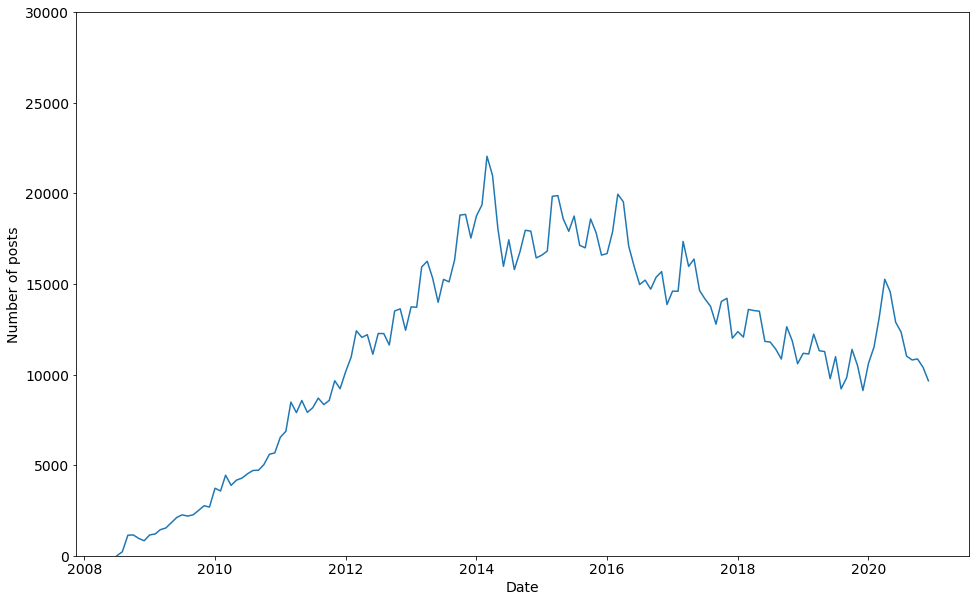

In [145]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 30000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

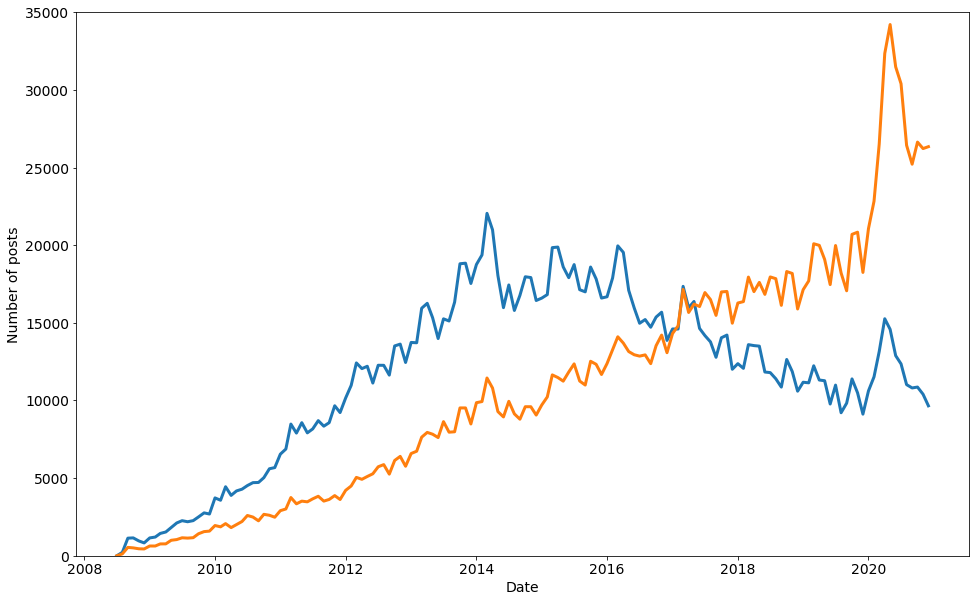

In [146]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(
    reshaped_df.index,
    reshaped_df.java,
    reshaped_df.python,
    linewidth=3,
)

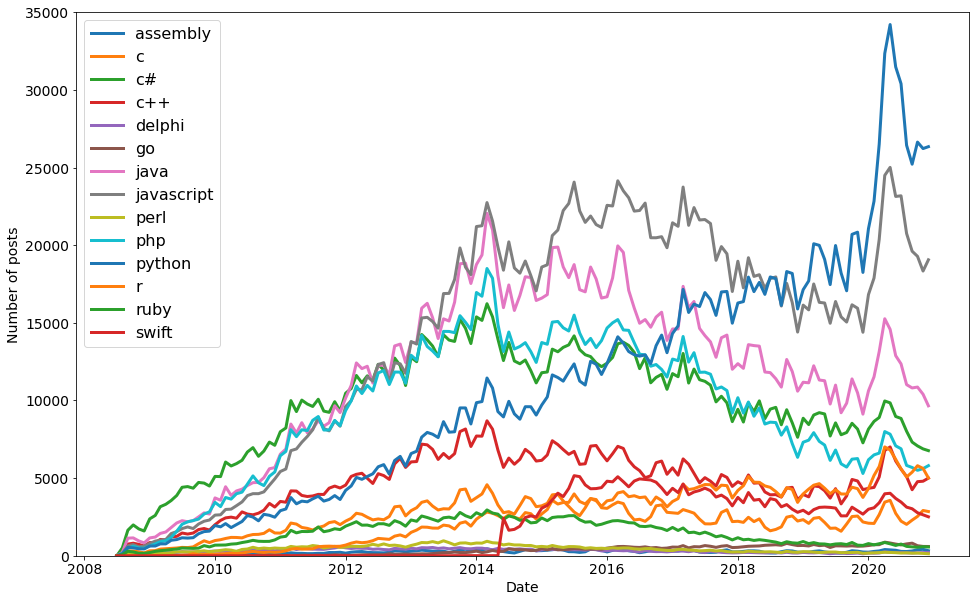

In [147]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(
        reshaped_df.index,
        reshaped_df[column],
        linewidth=3,
        label=reshaped_df[column].name
    )
    plt.legend(fontsize=16)

# Smoothing out Time Series Data (Moving Average)

Time series data can be quite noisy, with a lot of up and down spikes.
To better see a trend we can plot an average of, say 6 or 12 observations.
This is called the rolling mean.
We calculate the average in a window of time and move it forward by one observation.
Pandas has two handy methods already built in to work this out:
[rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and
[mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

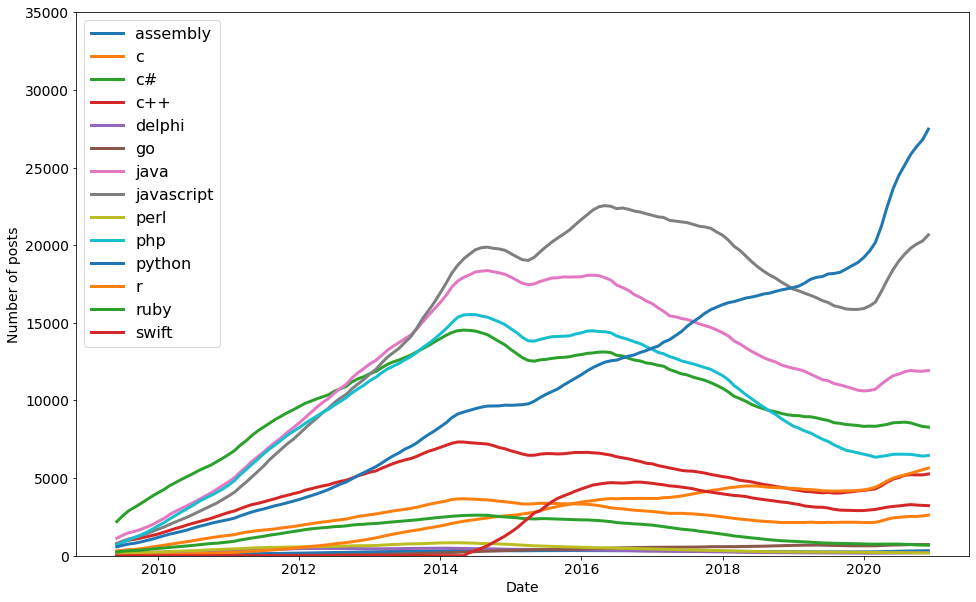

In [148]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(
        roll_df.index,
        roll_df[column],
        linewidth=3,
        label=roll_df[column].name
    )
    plt.legend(fontsize=16)

In [163]:
reshaped_df[reshaped_df.index.year <= 2012].sum().sort_values(ascending=False)

TAG
c#            380053.0
java          326254.0
php           302143.0
javascript    291108.0
c++           161842.0
python        148366.0
c              76793.0
ruby           59425.0
perl           22721.0
r              20812.0
delphi         17892.0
assembly        6899.0
go              1509.0
swift            148.0
dtype: float64

In [199]:
a = reshaped_df[reshaped_df.index.year >= 2015]
a[a.index.year <= 2018].sum().sort_values(ascending=False)

TAG
javascript    979171.0
java          733043.0
python        694235.0
php           577682.0
c#            544584.0
c++           265532.0
swift         196007.0
r             188249.0
c             131022.0
ruby           80826.0
go             26673.0
perl           19194.0
assembly       14768.0
delphi         13743.0
dtype: float64

In [200]:
reshaped_df[reshaped_df.index.year == 2020].sum().sort_values(ascending=False)

TAG
python        329671.0
javascript    247936.0
java          143132.0
c#             99417.0
php            77519.0
r              67779.0
c++            63241.0
swift          38761.0
c              31448.0
go              8678.0
ruby            8205.0
assembly        3977.0
delphi          2411.0
perl            2210.0
dtype: float64